In [2]:
import numpy as np
import math, random
import matplotlib.pyplot as plt

# Creating a binary dataset

Text(0, 0.5, 'Feature 2')

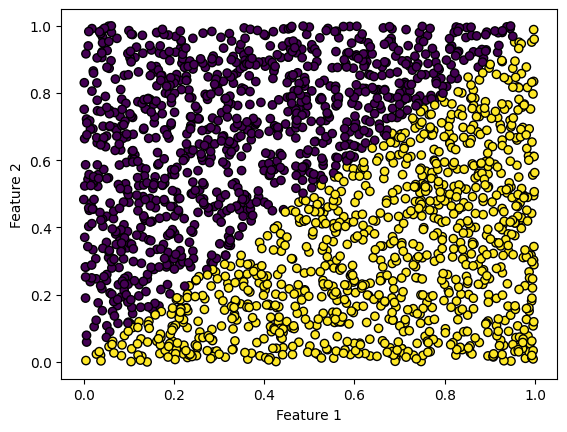

In [7]:
def binary_dataset(num_samples: int = 100):
    """
    Generates a binary dataset of size num_samples.
    """
    # Generate random points in the unit square
    points = np.random.rand(num_samples, 2)
    # Assign a label to each point
    labels = np.array([1 if (x[0] > x[1]) else 0 for x in points])
    return points, labels


#! Rememeber that instead of 0 and 1 classes, you put 1 and -1.
#! And since you were using the sigmoid function, which only outputs between 0 and 1, your code never converged.

X, Y = binary_dataset(2000)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=Y,
    cmap="viridis",
    edgecolors="k",
    marker="o",
    label="Data Points",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Online Logistic Regression

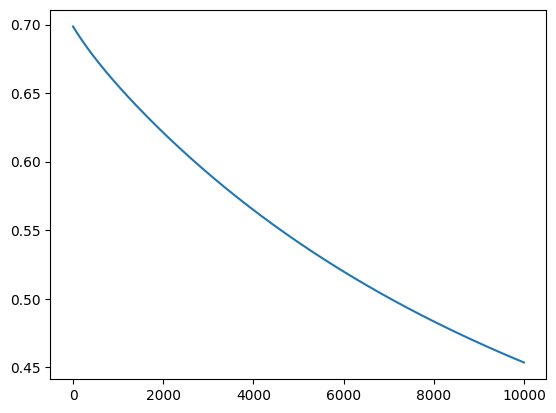

In [4]:
w_1 = 0
w_2 = 0
b = 0.2

learning_rate = 0.003
losses = []
epochs = 10000

delta_w1s = []
delta_w2s = []


def sigmoid(z: float):
    return 1 / (1 + math.exp(-z))


def cross_entropy_binary(y: int, y_hat: float):
    return -1 * ((y * math.log(y_hat)) + ((1 - y) * math.log(1 - y_hat)))


for epoch in range(epochs):
    for x, y in zip(X, Y):
        z = w_1 * x[0] + w_2 * x[1] + b
        y_hat = sigmoid(z)

        delta_w_1 = (y_hat - y) * x[0]
        delta_w_2 = (y_hat - y) * x[1]
        delta_b = y_hat - y

        delta_w1s.append(delta_w_1)
        delta_w2s.append(delta_w_2)

        w_1 -= learning_rate * delta_w_1 / len(X)
        w_2 -= learning_rate * delta_w_2 / len(X)
        b -= learning_rate * delta_b / len(X)

    loss = sum(
        [
            cross_entropy_binary(y, sigmoid(w_1 * x[0] + w_2 * x[1] + b))
            for x, y in zip(X, Y)
        ]
    ) / len(X)
    losses.append(loss)

plt.plot(losses)
plt.show()

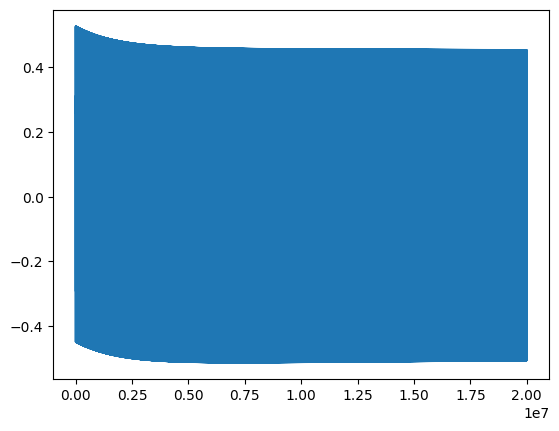

In [5]:
plt.plot(delta_w1s)

/var/folders/67/7hzlyd8j14x2f3w2xdrbh1xh0000gn/T/ipykernel_23398/3216955114.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(


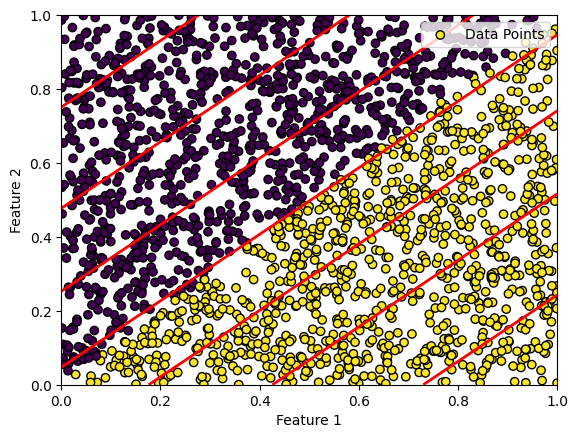

In [6]:
# Logistic function (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Calculate predicted probabilities
probs = sigmoid(w_1 * X[:, 0] + w_2 * X[:, 1] + b)

# Plot the logistic regression line
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=Y,
    cmap="viridis",
    edgecolors="k",
    marker="o",
    label="Data Points",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Create a grid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
zz = sigmoid(w_1 * xx.ravel() + w_2 * yy.ravel() + b)

# Reshape zz to have the same shape as xx and yy
zz = zz.reshape(xx.shape)

# Contour plot for decision boundary
plt.contour(xx, yy, zz, linewidths=2, colors="red", label="Decision Boundary")

plt.legend()
plt.show()

# Batch Gradient Descent

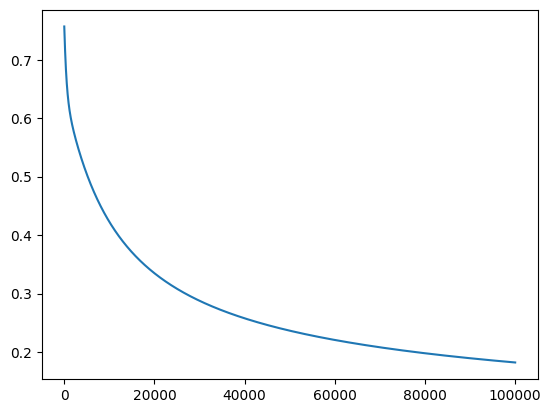

In [77]:
weights = np.random.rand(2)
bias = np.random.rand(1)

learning_rate = 0.003
losses = []
epochs = 100000


def sigmoid(z: np.array):
    return 1 / (1 + np.exp(-z))


for epoch in range(epochs):
    y_hat = sigmoid(np.dot(X, weights) + bias)
    error = y_hat - Y

    delta_w_1 = np.sum(np.dot(X[:, 0], error)) / len(X)
    delta_w_2 = np.sum(np.dot(X[:, 1], error)) / len(X)
    delta_b = np.sum(error) / len(X)

    weights[0] -= learning_rate * delta_w_1
    weights[1] -= learning_rate * delta_w_2
    bias -= learning_rate * delta_b

    loss = np.sum(-1 * ((Y * np.log(y_hat)) + ((1 - Y) * np.log(1 - y_hat)))) / len(X)
    losses.append(loss)

plt.plot(losses)
plt.show()

/var/folders/67/7hzlyd8j14x2f3w2xdrbh1xh0000gn/T/ipykernel_22106/232290152.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(


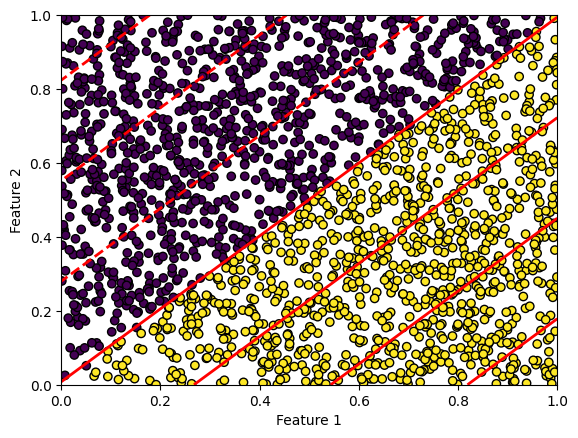

In [78]:
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
zz = weights[0] * xx.ravel() + weights[1] * yy.ravel() + bias

# Reshape zz to have the same shape as xx and yy
zz = zz.reshape(xx.shape)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=Y,
    cmap="viridis",
    edgecolors="k",
    marker="o",
    label="Data Points",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# Contour plot for decision boundary
plt.contour(xx, yy, zz, linewidths=2, colors="red", label="Decision Boundary")
plt.show()

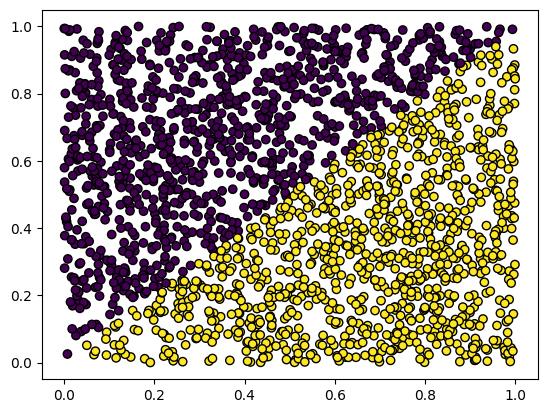

In [79]:
y_hat = [
    1 if sigmoid(x[0] * weights[0] + x[1] * weights[1] + bias) > 0.5 else 0 for x in X
]
plt.scatter(X[:, 0], X[:, 1], c=y_hat, cmap="viridis", edgecolors="k", marker="o")

# Feature Scaling 

## Creating a binary dataset with 2 features that don't have the same scale

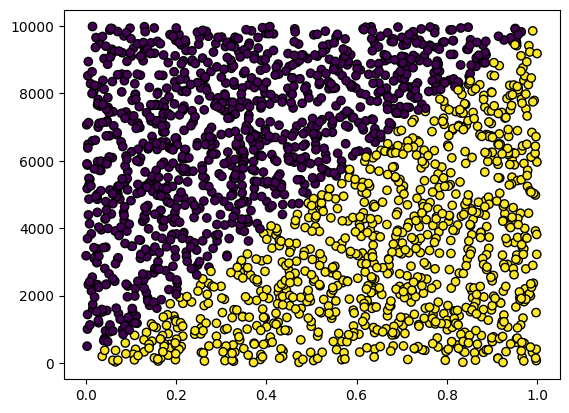

In [28]:
def create_binary_dataset(num_samples: int = 100):
    """
    Generates a binary dataset of size num_samples.
    The features do not have the same scale.
    """
    x1 = np.random.rand(num_samples)
    x2 = np.random.rand(num_samples) * 10000
    # Assign a label to each point
    labels = np.array([1 if (x[0] > x[1] / 10000) else 0 for x in zip(x1, x2)])
    return np.array([x1, x2]).T, labels


X_scale, Y_scale = create_binary_dataset(2000)
plt.scatter(
    X_scale[:, 0],
    X_scale[:, 1],
    c=Y_scale,
    cmap="viridis",
    edgecolors="k",
    marker="o",
    label="Data Points",
)

/var/folders/67/7hzlyd8j14x2f3w2xdrbh1xh0000gn/T/ipykernel_23398/547017531.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/67/7hzlyd8j14x2f3w2xdrbh1xh0000gn/T/ipykernel_23398/547017531.py:37: RuntimeWarning: divide by zero encountered in log
  -1 * ((Y_scale * np.log(y_hat)) + ((1 - Y_scale) * np.log(1 - y_hat)))
/var/folders/67/7hzlyd8j14x2f3w2xdrbh1xh0000gn/T/ipykernel_23398/547017531.py:37: RuntimeWarning: invalid value encountered in multiply
  -1 * ((Y_scale * np.log(y_hat)) + ((1 - Y_scale) * np.log(1 - y_hat)))


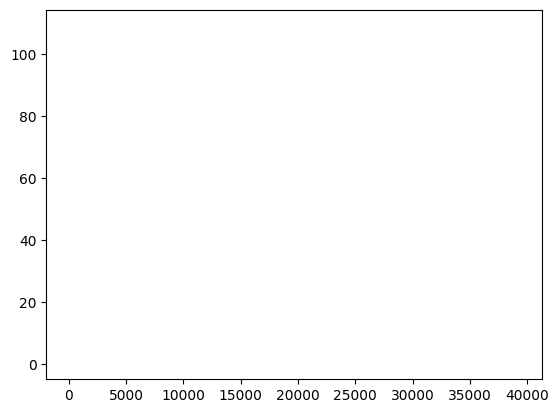

In [30]:
weights_scaled = np.zeros(2)
bias_scaled = np.zeros(1)

learning_rate = 0.003
epochs = 50000

w1_grads_scaled = []
w2_grads_scaled = []
losses_scaled = []


def sigmoid(z: np.array):
    return 1 / (1 + np.exp(-z))


def cross_entropy_binary(y: int, y_hat: float):
    return -1 * ((y * math.log(y_hat)) + ((1 - y) * math.log(1 - y_hat)))


for epoch in range(epochs):
    y_hat = sigmoid(np.dot(X_scale, weights_scaled) + bias_scaled)

    error = y_hat - Y_scale

    delta_w_1 = np.sum(np.dot(X_scale[:, 0], error)) / len(X_scale)
    delta_w_2 = np.sum(np.dot(X_scale[:, 1], error)) / len(X_scale)
    delta_b = np.sum(error) / len(X_scale)

    w1_grads_scaled.append(delta_w_1)
    w2_grads_scaled.append(delta_w_2)

    weights_scaled[0] -= learning_rate * delta_w_1
    weights_scaled[1] -= learning_rate * delta_w_2
    bias_scaled -= learning_rate * delta_b

    loss_scaled = np.sum(
        -1 * ((Y_scale * np.log(y_hat)) + ((1 - Y_scale) * np.log(1 - y_hat)))
    ) / len(X_scale)

    losses_scaled.append(loss_scaled)

plt.plot(losses_scaled)

Do you see how it fails? Do you see the overflow? Do you see how a simple difference in scales can make the algorithm fail?
Praise be the omnissiah, for he has given us the gift of feature scaling.
Use it and you shall be rewarded with a working algorithm.